# This is for testing M1 experiment

## Dataset: RAW

## VGG16

In [18]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
binary_model = load_model('./model/VGG16_M1A_model.h5')
multiclass_model = load_model('./model/VGG16_M1B_model.h5')

#define the path of testing set
Test_path = './output_M2/test/'

#create reality list
reality = []
for value in os.listdir(Test_path):
    for img in os.listdir(Test_path + value):
        
        if value.lower() == "c01":
            reality.append(0)

        elif value.lower() == "c02":
            reality.append(1)

        elif value.lower() == "c03":
            reality.append(2)

        elif value.lower() == "c04":
            reality.append(3)

        elif value.lower() == "c05":
            reality.append(4)

        elif value.lower() == "c06":
            reality.append(5)

        elif value.lower() == "c07":
            reality.append(6)

        elif value.lower() == "c08":
            reality.append(7)
            
        elif value.lower() == "c09":
            reality.append(8)

        else: 
            reality.append(9)


# Define the dictionary mapping the snake or not indices to the class names
snake_check = {0: 'non-snake', 1: 'snake'}

# Define the dictionary mapping the species class indices to the class names
species_names = {0: 'c01 - Chrysopelea ornata',
               1: 'c02 - Trimeresurus albolabris',
               2: 'c03 - Oligodon taeniatus',
               3: 'c04 - Coelognathus radiatus',
               4: 'c05 - Oligodon fasciolatus',
               5: 'c06 - Ptyas mucosa',
               6: 'c07 - Xenopeltis unicolor',
               7: 'c08 - Malayopython reticulatus',
               8: 'c09 - Naja kaouthia'}

# Set the directory of the images to be tested
# test_dir = './test/unknown/' # for unknown images
test_dir = './test_1/'

#create prediction list
predictions = []

# Loop through each image file in the directory
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Load the image
        img_path = os.path.join(test_dir, filename)
        img = tf.keras.utils.load_img(img_path, color_mode='rgb', target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Apply the prediction model
        prediction = binary_model.predict(img_array)
        predicted_check = np.argmax(prediction)
        
        if predicted_check == 0:
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', snake_check[predicted_check])
            print('********************************************************************')
            
            predictions.append(9)
          
        else:
             # Apply the prediction model
            prediction = multiclass_model.predict(img_array)
            predicted_class = np.argmax(prediction)
            
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', species_names[predicted_class])
            print('********************************************************************')
            
            predictions.append(predicted_class)

1/1 [==============================] - 0s 283ms/step
Image file: C01_ORN_104.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 164ms/step
Image file: C01_ORN_106.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 150ms/step
Image file: C01_ORN_107.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 192ms/step
Image file: C01_ORN_119.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 191ms/step
Image file: C01_ORN_12.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(reality, predictions)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(reality, predictions, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(reality, predictions, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(reality, predictions, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.840476
Precision: 0.845353
Recall: 0.840476
F1 score: 0.832591


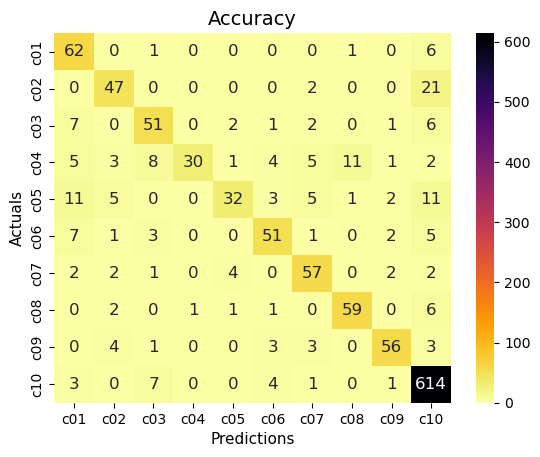

In [20]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

class_names = ('c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10')

confusion_mtx = confusion_matrix(reality, predictions)

dataframe = pd.DataFrame(confusion_mtx, index=class_names, columns=class_names)

ax = plt.axes()
sn.heatmap(dataframe, annot=True,annot_kws={"size": 12}, cmap="inferno_r", ax = ax, fmt=".0f")
ax.set_title('Accuracy', size=14)
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.savefig('./saved_result/RAW/VGG16-acc-heatmap.png')
plt.show()

## VGG19

In [21]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
binary_model = load_model('./model/VGG19_M1A_model.h5')
multiclass_model = load_model('./model/VGG19_M1B_model.h5')

#define the path of testing set
Test_path = './output_M2/test/'

#create reality list
reality = []
for value in os.listdir(Test_path):
    for img in os.listdir(Test_path + value):
        
        if value.lower() == "c01":
            reality.append(0)

        elif value.lower() == "c02":
            reality.append(1)

        elif value.lower() == "c03":
            reality.append(2)

        elif value.lower() == "c04":
            reality.append(3)

        elif value.lower() == "c05":
            reality.append(4)

        elif value.lower() == "c06":
            reality.append(5)

        elif value.lower() == "c07":
            reality.append(6)

        elif value.lower() == "c08":
            reality.append(7)
            
        elif value.lower() == "c09":
            reality.append(8)

        else: 
            reality.append(9)


# Define the dictionary mapping the snake or not indices to the class names
snake_check = {0: 'non-snake', 1: 'snake'}

# Define the dictionary mapping the species class indices to the class names
species_names = {0: 'c01 - Chrysopelea ornata',
               1: 'c02 - Trimeresurus albolabris',
               2: 'c03 - Oligodon taeniatus',
               3: 'c04 - Coelognathus radiatus',
               4: 'c05 - Oligodon fasciolatus',
               5: 'c06 - Ptyas mucosa',
               6: 'c07 - Xenopeltis unicolor',
               7: 'c08 - Malayopython reticulatus',
               8: 'c09 - Naja kaouthia'}

# Set the directory of the images to be tested
# test_dir = './test/unknown/' # for unknown images
test_dir = './test_1/'

#create prediction list
predictions = []

# Loop through each image file in the directory
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Load the image
        img_path = os.path.join(test_dir, filename)
        img = tf.keras.utils.load_img(img_path, color_mode='rgb', target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Apply the prediction model
        prediction = binary_model.predict(img_array)
        predicted_check = np.argmax(prediction)
        
        if predicted_check == 0:
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', snake_check[predicted_check])
            print('********************************************************************')
            
            predictions.append(9)
          
        else:
             # Apply the prediction model
            prediction = multiclass_model.predict(img_array)
            predicted_class = np.argmax(prediction)
            
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', species_names[predicted_class])
            print('********************************************************************')
            
            predictions.append(predicted_class)

1/1 [==============================] - 0s 367ms/step
Image file: C01_ORN_104.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 200ms/step
Image file: C01_ORN_106.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 195ms/step
Image file: C01_ORN_107.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 203ms/step
Image file: C01_ORN_119.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 201ms/step
Image file: C01_ORN_12.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(reality, predictions)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(reality, predictions, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(reality, predictions, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(reality, predictions, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.855556
Precision: 0.859232
Recall: 0.855556
F1 score: 0.849422


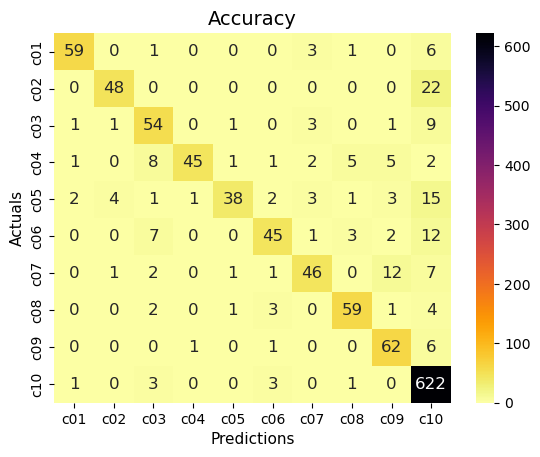

In [23]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

class_names = ('c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10')

confusion_mtx = confusion_matrix(reality, predictions)

dataframe = pd.DataFrame(confusion_mtx, index=class_names, columns=class_names)

ax = plt.axes()
sn.heatmap(dataframe, annot=True,annot_kws={"size": 12}, cmap="inferno_r", ax = ax, fmt=".0f")
ax.set_title('Accuracy', size=14)
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.savefig('./saved_result/RAW/VGG19-acc-heatmap.png')
plt.show()

## InceptionV3

In [24]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
binary_model = load_model('./model/InceptionV3_M1A_model.h5')
multiclass_model = load_model('./model/InceptionV3_M1B_model.h5')

#define the path of testing set
Test_path = './output_M2/test/'

#create reality list
reality = []
for value in os.listdir(Test_path):
    for img in os.listdir(Test_path + value):
        
        if value.lower() == "c01":
            reality.append(0)

        elif value.lower() == "c02":
            reality.append(1)

        elif value.lower() == "c03":
            reality.append(2)

        elif value.lower() == "c04":
            reality.append(3)

        elif value.lower() == "c05":
            reality.append(4)

        elif value.lower() == "c06":
            reality.append(5)

        elif value.lower() == "c07":
            reality.append(6)

        elif value.lower() == "c08":
            reality.append(7)
            
        elif value.lower() == "c09":
            reality.append(8)

        else: 
            reality.append(9)


# Define the dictionary mapping the snake or not indices to the class names
snake_check = {0: 'non-snake', 1: 'snake'}

# Define the dictionary mapping the species class indices to the class names
species_names = {0: 'c01 - Chrysopelea ornata',
               1: 'c02 - Trimeresurus albolabris',
               2: 'c03 - Oligodon taeniatus',
               3: 'c04 - Coelognathus radiatus',
               4: 'c05 - Oligodon fasciolatus',
               5: 'c06 - Ptyas mucosa',
               6: 'c07 - Xenopeltis unicolor',
               7: 'c08 - Malayopython reticulatus',
               8: 'c09 - Naja kaouthia'}

# Set the directory of the images to be tested
# test_dir = './test/unknown/' # for unknown images
test_dir = './test_1/'

#create prediction list
predictions = []

# Loop through each image file in the directory
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Load the image
        img_path = os.path.join(test_dir, filename)
        img = tf.keras.utils.load_img(img_path, color_mode='rgb', target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Apply the prediction model
        prediction = binary_model.predict(img_array)
        predicted_check = np.argmax(prediction)
        
        if predicted_check == 0:
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', snake_check[predicted_check])
            print('********************************************************************')
            
            predictions.append(9)
          
        else:
             # Apply the prediction model
            prediction = multiclass_model.predict(img_array)
            predicted_class = np.argmax(prediction)
            
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', species_names[predicted_class])
            print('********************************************************************')
            
            predictions.append(predicted_class)

1/1 [==============================] - 2s 2s/step
Image file: C01_ORN_104.jpg
Predicted class: non-snake
********************************************************************
1/1 [==============================] - 0s 192ms/step
Image file: C01_ORN_106.jpg
Predicted class: non-snake
********************************************************************
1/1 [==============================] - 0s 203ms/step
Image file: C01_ORN_107.jpg
Predicted class: non-snake
********************************************************************
1/1 [==============================] - 0s 201ms/step
Image file: C01_ORN_119.jpg
Predicted class: non-snake
********************************************************************
1/1 [==============================] - 0s 211ms/step
Image file: C01_ORN_12.jpg
Predicted class: non-snake
********************************************************************
1/1 [==============================] - 0s 211ms/step
Image file: C01_ORN_121.jpg
Predicted class: non-snake
***********

In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(reality, predictions)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(reality, predictions, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(reality, predictions, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(reality, predictions, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.390476
Precision: 0.248202
Recall: 0.390476
F1 score: 0.303433


F:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


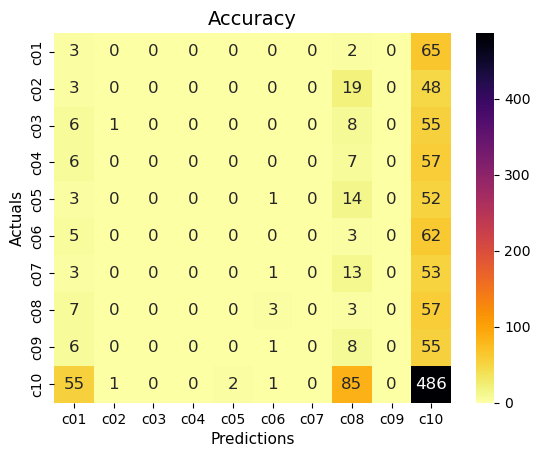

In [26]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

class_names = ('c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10')

confusion_mtx = confusion_matrix(reality, predictions)

dataframe = pd.DataFrame(confusion_mtx, index=class_names, columns=class_names)

ax = plt.axes()
sn.heatmap(dataframe, annot=True,annot_kws={"size": 12}, cmap="inferno_r", ax = ax, fmt=".0f")
ax.set_title('Accuracy', size=14)
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.savefig('./saved_result/RAW/InceptionV3-acc-heatmap.png')
plt.show()

## Resnet50

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
binary_model = load_model('./model/Resnet50_M1A_model.h5')
multiclass_model = load_model('./model/Resnet50_M1B_model.h5')

#define the path of testing set
Test_path = './output_M2/test/'

#create reality list
reality = []
for value in os.listdir(Test_path):
    for img in os.listdir(Test_path + value):
        
        if value.lower() == "c01":
            reality.append(0)

        elif value.lower() == "c02":
            reality.append(1)

        elif value.lower() == "c03":
            reality.append(2)

        elif value.lower() == "c04":
            reality.append(3)

        elif value.lower() == "c05":
            reality.append(4)

        elif value.lower() == "c06":
            reality.append(5)

        elif value.lower() == "c07":
            reality.append(6)

        elif value.lower() == "c08":
            reality.append(7)
            
        elif value.lower() == "c09":
            reality.append(8)

        else: 
            reality.append(9)


# Define the dictionary mapping the snake or not indices to the class names
snake_check = {0: 'non-snake', 1: 'snake'}

# Define the dictionary mapping the species class indices to the class names
species_names = {0: 'c01 - Chrysopelea ornata',
               1: 'c02 - Trimeresurus albolabris',
               2: 'c03 - Oligodon taeniatus',
               3: 'c04 - Coelognathus radiatus',
               4: 'c05 - Oligodon fasciolatus',
               5: 'c06 - Ptyas mucosa',
               6: 'c07 - Xenopeltis unicolor',
               7: 'c08 - Malayopython reticulatus',
               8: 'c09 - Naja kaouthia'}

# Set the directory of the images to be tested
# test_dir = './test/unknown/' # for unknown images
test_dir = './test_1/'

#create prediction list
predictions = []

# Loop through each image file in the directory
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        # Load the image
        img_path = os.path.join(test_dir, filename)
        img = tf.keras.utils.load_img(img_path, color_mode='rgb', target_size=(224, 224))
        img_array = tf.keras.utils.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)

        # Apply the prediction model
        prediction = binary_model.predict(img_array)
        predicted_check = np.argmax(prediction)
        
        if predicted_check == 0:
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', snake_check[predicted_check])
            print('********************************************************************')
            
            predictions.append(9)
          
        else:
             # Apply the prediction model
            prediction = multiclass_model.predict(img_array)
            predicted_class = np.argmax(prediction)
            
            # Print the predicted class
            print('Image file:', filename)
            print('Predicted class:', species_names[predicted_class])
            print('********************************************************************')
            
            predictions.append(predicted_class)

1/1 [==============================] - 1s 1s/step
Image file: C01_ORN_104.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 269ms/step
Image file: C01_ORN_106.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 267ms/step
Image file: C01_ORN_107.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 266ms/step
Image file: C01_ORN_119.jpg
Predicted class: c01 - Chrysopelea ornata
********************************************************************
1/1 [==============================] - 0s 274ms/step
Image file: C01_ORN_12.jpg
Predicted class: non-snake
********************************************************************
1/1 [==============================] - 0s 272ms/step
Image 

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(reality, predictions)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(reality, predictions, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(reality, predictions, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(reality, predictions, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.857937
Precision: 0.860222
Recall: 0.857937
F1 score: 0.846787


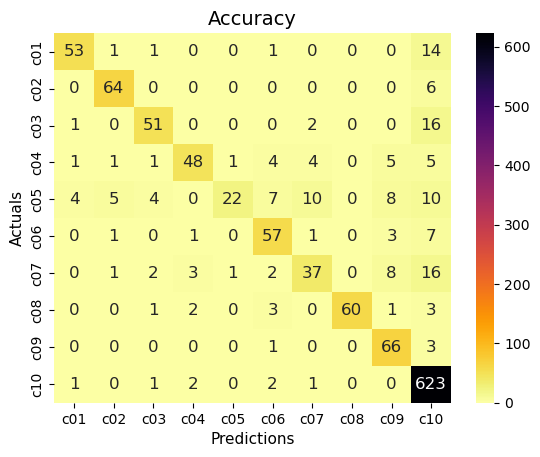

In [29]:
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix

class_names = ('c01', 'c02', 'c03', 'c04', 'c05', 'c06', 'c07', 'c08', 'c09', 'c10')

confusion_mtx = confusion_matrix(reality, predictions)

dataframe = pd.DataFrame(confusion_mtx, index=class_names, columns=class_names)

ax = plt.axes()
sn.heatmap(dataframe, annot=True,annot_kws={"size": 12}, cmap="inferno_r", ax = ax, fmt=".0f")
ax.set_title('Accuracy', size=14)
plt.xlabel('Predictions', fontsize=11)
plt.ylabel('Actuals', fontsize=11)
plt.savefig('./saved_result/RAW/Resnet50-acc-heatmap.png')
plt.show()